In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import cos, sin, arcsin, sqrt
from math import radians
from sklearn import preprocessing

In [3]:
df_listings = pd.read_csv("listings.csv")

Questions to answer in order to find a suitable housing for me:
1. Which apartments are affordable
2. How far to walk to work
3. Is it available in certain timeframe

Preprocessing

Drop relevant missing values

In [4]:
#df_listings.head()

In [5]:
#df_listings.isnull().sum()
#I do not care about host_name or reviews

Define limitations

In [6]:
#Target location
work_loclat = 40.71214
work_loclong = -74.01473

# Affordable restriction
af_price = 440
availability = 2*20
pref_room = 'Entire home/apt'

#User prefrences: I do not care about price as long as it is within 440. Location is important
pref_price = 1
pref_loc = 5

Filter limitations

In [7]:
df = df_listings.loc[(df_listings.price < af_price) 
                    & (df_listings.room_type == pref_room)
                    & (df_listings.availability_365 > availability)
                    & (df_listings.minimum_nights <= availability)
                    ]

In [8]:
print(str(round((1-df.shape[0]/df_listings.shape[0])*100,2)) + "% dropped due to price restriction, room_type and availability")

75.97% dropped due to price restriction, room_type and availability


Define and apply distance computer

In [9]:
def haversine(row):
    lon1 = work_loclong
    lat1 = work_loclat
    lon2 = row['longitude']
    lat2 = row['latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

In [10]:
df['distance'] = df.apply(lambda row: haversine(row), axis=1)

/opt/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


8.188696272630626


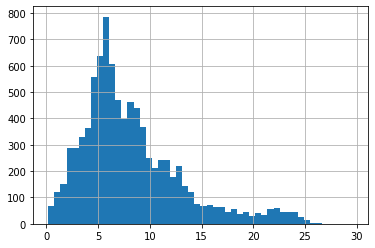

In [11]:
df.distance.hist(bins=50);
print(df.distance.mean())

162.87001127395715


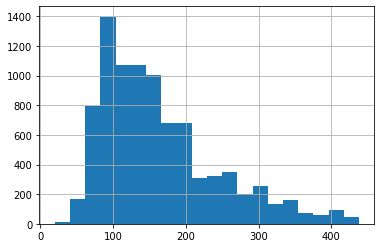

In [12]:
df['price'].hist(bins=20);
print(df.price.mean())

Normalizing for fun

In [13]:
df['price_norm'] = (df.price-df.price.min())/(df.price.max()-df.price.min())
df['distance_norm'] = (df.distance-df.distance.min())/(df.distance.max()-df.distance.min())

/opt/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Pref score, which respects the user preferenes (i.e. I care about distance and not price as mentioned in the beginning)

In [14]:
df['pref_score'] = pref_price*df.price_norm+pref_loc*df.distance_norm

/opt/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.sort_values(by=['pref_score'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance,price_norm,distance_norm,pref_score
29497,42793766,Modern + Clean Apartment in Downtown Manhattan!!,276786633,Lara,Manhattan,Financial District,40.71190,-74.01257,Entire home/apt,95,2,0,NaN,NaN,1,363,0.183887,0.179426,0.000000,0.179426
26145,38958327,The Residences at W New York - Downtown - Apt 29C,48005494,Zeus,Manhattan,Financial District,40.71002,-74.01441,Entire home/apt,118,30,3,2021-03-31,0.41,38,168,0.237122,0.234450,0.001809,0.243494
26260,39103956,Superb 1 Bedroom in The W Residences Downtown,299502034,Ryan,Manhattan,Battery Park City,40.71005,-74.01478,Entire home/apt,119,30,1,2020-07-23,0.11,1,254,0.232290,0.236842,0.001645,0.245066
10581,13495012,World Trade Center Delight,9007512,Illy,Manhattan,Financial District,40.70568,-74.01075,Entire home/apt,80,30,6,2021-01-31,0.11,1,100,0.792297,0.143541,0.020674,0.246909
36779,49011831,A PIECE OF ITALY! 3 BEDROOM APT IN LITTLE ITALY,228915442,Lu,Manhattan,Little Italy,40.71945,-73.99767,Entire home/apt,20,30,0,NaN,NaN,1,365,1.650645,0.000000,0.049840,0.249201
28666,41909354,"NYC, New York, Lower Manhattan, Manhattan",231727934,Sky,Manhattan,Financial District,40.70713,-74.01073,Entire home/apt,96,7,2,2020-07-06,0.14,3,253,0.650758,0.181818,0.015864,0.261139
35061,47889218,Spacious artsy studio downtown Manhattan,257653121,Anna,Manhattan,Financial District,40.70578,-74.00969,Entire home/apt,90,30,0,NaN,NaN,1,74,0.824468,0.167464,0.021767,0.276299
26146,38958347,The Residences at W New York - Downtown - Apt 29D,48005494,Zeus,Manhattan,Financial District,40.71008,-74.01417,Entire home/apt,132,30,1,2021-03-09,0.94,38,73,0.233727,0.267943,0.001694,0.276410
25683,38236832,The Residences at W New York - Downtown - Apt 27E,48005494,Zeus,Manhattan,Financial District,40.71024,-74.01439,Entire home/apt,134,30,3,2020-12-13,0.35,38,167,0.213071,0.272727,0.000992,0.277686
11630,15057784,Furnished Battery Park Apartment,80603103,Gary,Manhattan,Battery Park City,40.70658,-74.01622,Entire home/apt,106,30,1,2020-01-05,0.07,1,87,0.630475,0.205742,0.015175,0.281617


Questions to answer in order to find a suitable housing for me:
1. Which apartments are affordable
2. How far to walk to work
3. Is it available in certain timeframe

In [17]:
print('By respecting my stated questions and preferences for location distance to work and affordability,\nit seems like I will check out the ' + str(df.sort_values(by=['pref_score']).iloc[0][1]) + ' for ' + str(df.sort_values(by=['pref_score']).iloc[0][9]) + '$ per night!')

By respecting my stated questions and preferences for location distance to work and affordability,
it seems like I will check out the Modern + Clean Apartment in Downtown Manhattan!! for 95$ per night!
